## Co-Integration Test

- Author: Ayush Patel
- Github: https://github.com/Ayush-Patel15 
- LinkedIn: https://www.linkedin.com/in/ayush-15-patel/

<hr>

As we discussed in the previous post about stationarity, most financial time-series, such as stock prices, are inherently non-stationary. They consist of trends or drifts, making it challenging to directly analyze or model their behavior. However, when trading, we often look for relationships that are predictable over time. This is where the concept of co-integration becomes crucial.

### What is Co-integration?

Co-integration is a statistical property of two or more non-stationary time-series. Even though these series may individually wander or drift over time, and are non-stationary, there exists a stable, long-term relationship between them. This means their spread — the difference or linear combination of their values—remains stationary over time, It'a a basic essential for pairs trading technique. The proper defination of co-integration is: Cointegration occurs when two or more nonstationary time series:
- Have a long-run equilibrium.
- Move together in such a way that their linear combination results in a stationary time series. 
- Share an underlying common stochastic trend.


`For example:` To understand the mathematics of cointegration, let's consider a group of time series, $Y_t$, which is composed of three separate time series: $y_{1t}$, $y_{2t}$, $y_{3t}$. All three series are nonstationary time series. Cointegration implies that, they can be combined in a way that their linear combination is stationary:
$$\beta Y_t = \beta_1 y_{1t} + \beta_2 y_{2t} + \beta_3 y_{3t} \sim I(0)$$


### How Co-Integration Links to Stationarity

- Stationary Spread: In co-integrated pairs, while individual series are non-stationary, their spread becomes stationary. This aligns perfectly with the discussion about how stationarity makes data more predictable and easier to model.

- Market Neutrality: By focusing on the spread, pairs trading becomes market-neutral, meaning it’s less affected by broader market trends and more reliant on the specific relationship between the two assets.

<hr>

### Steps to Select Pairs for Co-Integration Testing

Identifying pairs of assets to test for co-integration is not random; it involves logical steps and domain knowledge. Here's how we can approach it:

- Industry or Sector-Based Selection: Start by focusing on assets from the same industry or sector. Stocks in the same sector often have similar business drivers and market reactions. Examples: Banking stocks like HDFC Bank and Axis Bank, FMCG giants like HUL and Nestle India.

- Correlation Check: Before testing for co-integration, check for a high correlation (e.g., > 0.7) between the assets’ historical prices. A high correlation indicates that the two assets tend to move together, which is a good starting point for co-integration testing. However, high correlation doesn't guarantee that they will be co-integrated. Explained in detail below.

- Historical Relationship: Ensure that the relationship between the assets has been consistent over time. Avoid pairs with abrupt changes or structural breaks in their historical prices.

- Liquidity: Only consider highly liquid assets to ensure that trades can be executed quickly without significant slippage or transaction costs Example: Stocks in Nifty50 are generally liquid and suitable for pairs trading.

- Co-Integration Test: Finally, apply statistical tests like the Engle-Granger Test or Johansen Test to confirm whether the pair is co-integrated. A co-integration test will determine if the spread between the assets is stationary.

<hr>

### Cointegration vs Correlation

Although the correlation coefficient and cointegration both describe some underlying relationship between variables, the two properties are not synonymous. It is very possible for two time series to have weak/strong correlation but strong/weak cointegration.

- `Strong correlation and no cointegration`: The two series are clearly correlated but the difference/spread between them changes with time.<br><br>
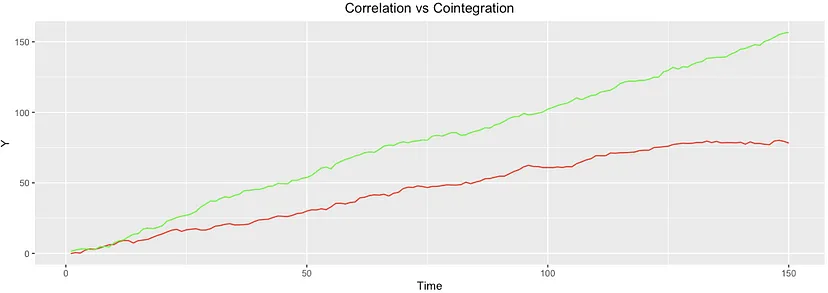

- `Strong correlation and cointegration`: The two series are perfectly correlated and cointegrated since the difference/spread between the two doesn’t change with time.<br><br>
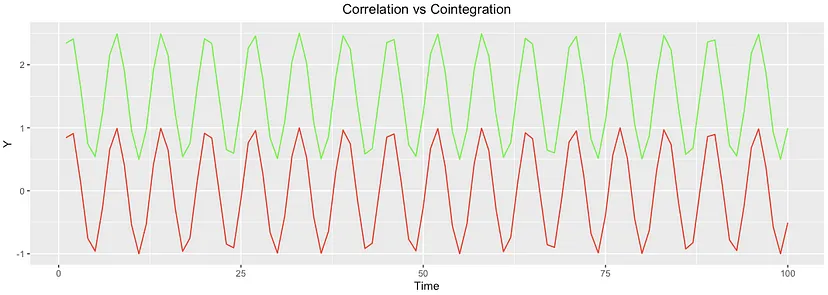

- `No correlation but strong cointegration`: The two series are not correlated, but cointegrated since the difference/spread between the two doesn’t change with time.<br><br>
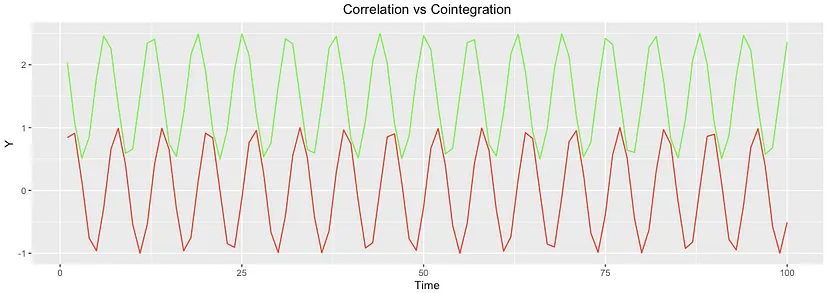

<hr>

### Use Python to test for Co-integration

As usual, let's use python to test for cointegration. The key conditions are:

- I will use KOTAKBANK and SBIN, to show the test of cointegration.
- I will use the internatl coint function, from statsmodel. (This uses the augmented Engle-Granger two-step cointegration test)
- Will take the data of past three years i.e. from 2021 to 2024

`NOTE: For this kind of properties, we need to constantly re-check the pair, that it hold for co-integration or not. Therefore, I have taken the data for last 3 years, and not beyond that. Do keep in mind, they can easily loose the co-integration in between them. Becuase of this, generally either the indices or ETF's are used for co-integrated paris. They tend to follow the properties for a longer time.`

In [1]:
## Import Statements
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import pandas as pd

## Folderpath for both of instruments
STOCK_FILEPATH_1 = "E:\\Market-Work\\All-Data\\Daily_Data-Stocks_Indices\\KOTAKBANK.csv"
STOCK_FILEPATH_2 = "E:\\Market-Work\\All-Data\\Daily_Data-Stocks_Indices\\SBIN.csv"

## Function to test for cointegration
stock_df_1 = pd.read_csv(STOCK_FILEPATH_1, index_col=0, usecols=["Date","Close"])
stock_df_2 = pd.read_csv(STOCK_FILEPATH_2, index_col=0, usecols=["Date","Close"])
## Slice out the dataframe, for the past from 2021-2024
stock_df_1 = stock_df_1.loc["2021":]
stock_df_2 = stock_df_2.loc["2021":]
p_value = coint(stock_df_1["Close"], stock_df_2["Close"])[1]
print("P-value for the pair of KotakBank and Sbi:", p_value)
print("As, the p-value is lesser than 0.05. Therefore, we can say that the pair is cointegrated !!")

P-value for the pair of KotakBank and Sbi: 0.00035383455211143277
As, the p-value is lesser than 0.05. Therefore, we can say that the pair is cointegrated !!


`IMPORTANT:` I have used the coint function from the statsmodels, internally it uses the Engle-Granger two-step cointegration test. And it is capable of doing the test only for two time series data. However, the linear combination of more than two assets can also be a cointegrated pair. For this kind of scenario's, we can use the Johansen test. Johansen test is capable of testing more than two assets for cointegration

<hr>

### Usage of Cointegration: Mean Reversion Pairs Trading

Mean reversion pairs trading is a market-neutral strategy that exploits the concept of mean reversion, where the price difference (spread) between two cointegrated assets tends to revert to its historical average over time. This strategy involves identifying two assets (like stocks, ETFs, or commodities) that move together in the long term but deviate temporarily, creating trading opportunities. In pairs trading, the idea of cointegration is key. Let’s understand why:

- Market Behavior: Many stocks or assets from the same sector or industry exhibit similar behavior due to shared fundamentals, economic factors, or market trends.

- Mean-Reverting Opportunities: If the spread between two co-integrated assets deviates from its historical mean, we can expect it to revert. This creates opportunities to buy the undervalued asset and sell the overvalued asset, profiting from the eventual correction.

- Without co-integration, the relationship between assets may not hold, making such trades highly risky and less reliable.

### Importance of Mean Reversion Pairs Trading

- Market Neutrality: Pairs trading is a market-neutral strategy, meaning it’s unaffected by broader market movements. This makes it especially valuable during volatile or sideways markets.

- Exploits Temporary Inefficiencies: The strategy profits from temporary mispricings between two assets that are expected to converge due to their long-term relationship.

- Risk Reduction: By going long and short simultaneously, the strategy minimizes exposure to systematic market risks (e.g., market crashes).

- Diversification: Offers a unique way to diversify portfolio returns by leveraging statistical relationships rather than relying on outright market trends.

- Adaptable Across Asset Classes: Can be applied to stocks, ETFs, commodities, currencies, and even cryptocurrencies, provided the assets exhibit co-integration.

<hr>

### Steps to get the Spread, and backtest

- Test the movement of pair for cointegration. As I have mentioned earlier.
- Once, we get a p-value lesser than 0.05, we can conclude that the pair is cointegrated.
- Use the OLS regression method to find the linear relationship between the stocks.
- Use the Beta/Coeficient of OLS method, as a hedge ratio for the instrument.
- Create the spread using the equation as: y + $\beta_0$ x
- Check for stationarity of spread created.
- If the spread is stationary, we can apply the mean reversion technique to trade.
- Benefit, from the extreme movement conditions i.e. like 1sd, 2sd, etc.
- Buy the stock with y, and sell the stock x in $\beta_0$  as the ratio.
- You can backtest and forward test the strategy, for the spread equation.

<hr>

`DISCLAIMER`: This is just for the purpose of knowledge and my own learning, and not any advice to create any kind of portfolio based on the post. Do you own analysis and invest in markets. However, this is just for my own learning purpose, so need not to worry. For learning purpose, I can test for any weird possibilities, even if doesn't make any sense in the practical world.

Do let me know, if you want more details on the spread and backtest process for mean reversion pairs.

<hr>